In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../../sd_foregrounds/

/Data/abitbol/sd_foregrounds


In [3]:
import super_pixie
import spectral_distortions as sd
import foregrounds as fg

In [4]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

rcParams['lines.linewidth'] = 3
    
rcParams['xtick.labelsize'] = 30
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 5
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['xtick.bottom'] = True
rcParams['xtick.top'] = True
rcParams['xtick.direction'] = 'in'


rcParams['ytick.labelsize'] = 30
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
rcParams['ytick.left'] = True
rcParams['ytick.right'] = True
rcParams['ytick.direction'] = 'in'


rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [28]:
ghz = 1e-9

In [29]:
freqs = np.linspace(1, 6001, 6000) * 1e9 

In [30]:
fish = super_pixie.FisherEstimation()

In [31]:
data = {}
for fnc in fish.signals:
    name = fnc.__name__
    data[name] = fnc(freqs)

In [35]:
total_fg = (data['synch']+data['cib']+data['freefree']
            +data['spinning_dust']+data['co']+data['thermal_dust'])
y_dist = sd.DeltaI_y(freqs)
relt_dist = sd.DeltaI_reltSZ_2param_yweight(freqs)
mu_dist = data['DeltaI_mu']

In [36]:
mask_mu = mu_dist < 0
mask_y = y_dist < 0
mask_sz = (relt_dist-y_dist) < 0
mask2 = freqs[~mask_sz] < 210e9

In [39]:
oneyr = 365.25 * 24. * 3600. # 1yr in seconds
jy = 1.e26

lf_data = np.loadtxt('templates/write_apc_fts_noise_low.txt')
mf_data = np.loadtxt('templates/write_apc_fts_noise_mid.txt')
hf_data = np.loadtxt('templates/write_apc_fts_noise_high.txt')

lf_nu = lf_data[:, 0]
mf_nu = mf_data[:, 0]
hf_nu = hf_data[:, 0]

lf_noise = lf_data[:, 1] * jy / np.sqrt(oneyr)
mf_noise = mf_data[:, 1] * jy / np.sqrt(oneyr)
hf_noise = hf_data[:, 1] * jy / np.sqrt(oneyr)

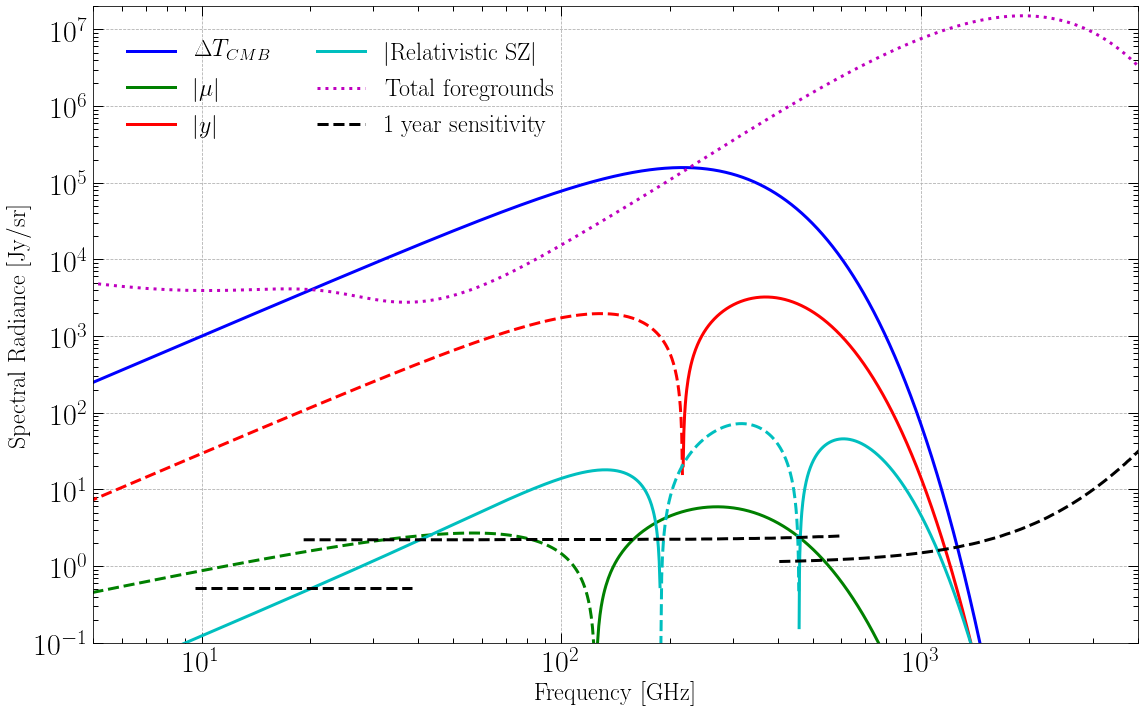

In [41]:
figure(figsize=(16, 10))
plot(freqs*ghz, data['DeltaI_DeltaT'], 'blue', label='$\Delta T_{CMB}$')

plot(freqs[~mask_mu]*ghz, np.abs(mu_dist[~mask_mu]), 'g', label='$|\mu|$')
plot(freqs[mask_mu]*ghz, np.abs(mu_dist[mask_mu]), color='g', ls='dashed')

plot(freqs[~mask_y]*ghz, np.abs(y_dist[~mask_y]), 'red', label='$|y|$')
plot(freqs[mask_y]*ghz, np.abs(y_dist[mask_y]), color='red', ls='dashed')

plot(freqs[~mask_sz][mask2]*ghz, np.abs(relt_dist-y_dist)[~mask_sz][mask2], 'c', 
       label='$\mathrm{|Relativistic\ SZ|}$')
plot(freqs[~mask_sz][~mask2]*ghz, np.abs(relt_dist-y_dist)[~mask_sz][~mask2], 'c')
plot(freqs[mask_sz]*ghz, np.abs(relt_dist-y_dist)[mask_sz], color='c', ls='dashed')

plot(freqs*ghz, total_fg, 'm', ls='dotted', label='$\mathrm{Total\ foregrounds}$')

plot(lf_nu, lf_noise, 'k--', label='$\mathrm{1\ year\ sensitivity}$')
plot(mf_nu, mf_noise, 'k--')
plot(hf_nu, hf_noise, 'k--')

xscale('log')
yscale('log')
#xticks([10, 100, 1000, 4000], ['$10$', '$100$', '$1000$', '$4000$'])
legend(loc=2, framealpha=0., ncol=2, fontsize=24, handlelength=2)
grid(ls='--')
xlim([5, 4e3])
ylim([1e-1, 2e7])
xlabel('$\mathrm{Frequency\ [GHz]}$', size=24)
ylabel('$\mathrm{Spectral\ Radiance\ [Jy/sr]}$', size=24)
tight_layout()
#savefig('/home/mabitbol/cmb_fg_H0_signals.pdf', fmt='pdf', dpi=300)

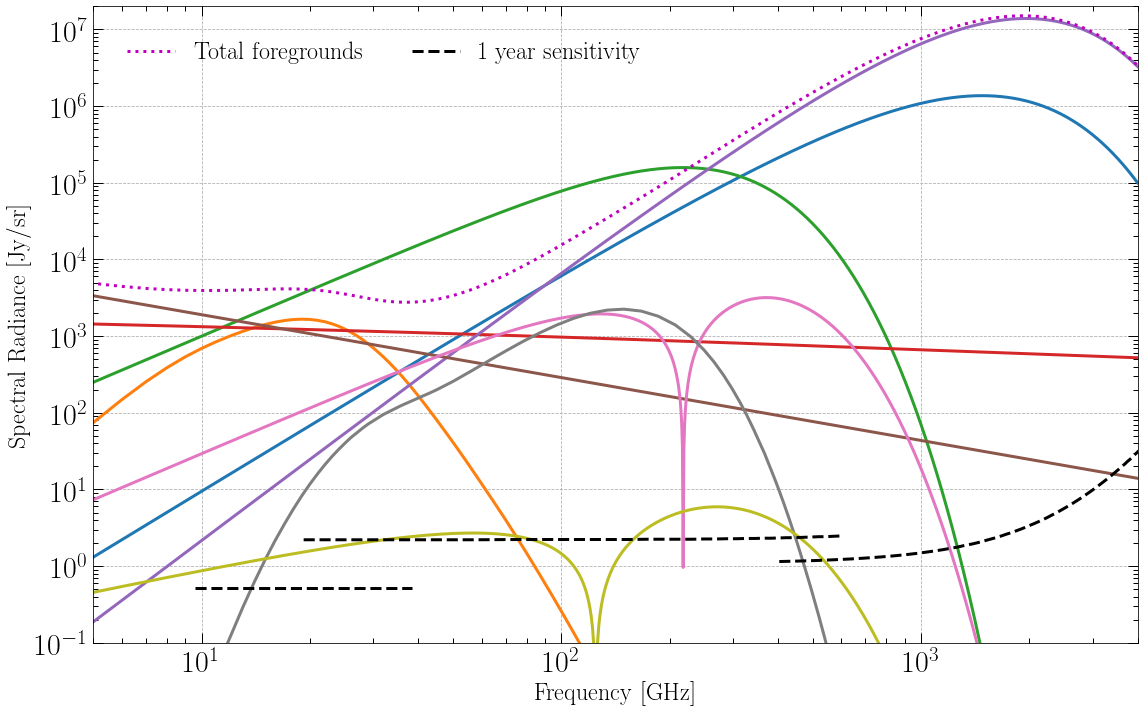

In [49]:
figure(figsize=(16, 10))

for k in data.iteritems():
    plot(freqs*ghz, np.abs(k[1]))

plot(freqs*ghz, total_fg, 'm', ls='dotted', label='$\mathrm{Total\ foregrounds}$')

plot(lf_nu, lf_noise, 'k--', label='$\mathrm{1\ year\ sensitivity}$')
plot(mf_nu, mf_noise, 'k--')
plot(hf_nu, hf_noise, 'k--')

xscale('log')
yscale('log')
#xticks([10, 100, 1000, 4000], ['$10$', '$100$', '$1000$', '$4000$'])
legend(loc=2, framealpha=0., ncol=2, fontsize=24, handlelength=2)
grid(ls='--')
xlim([5, 4e3])
ylim([1e-1, 2e7])
xlabel('$\mathrm{Frequency\ [GHz]}$', size=24)
ylabel('$\mathrm{Spectral\ Radiance\ [Jy/sr]}$', size=24)
tight_layout()